In [3]:
import pandas as pd
import sqlite3
import seaborn as sns

In [5]:
df = pd.read_csv('../combined_data_clean.csv', index_col='id')
df.head()

,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate
id,,,,,,,,,,,
1,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0,4.1
2,400000,5109 E THOMAS RD,85018,Active,6243667,PAPAGO VILLAGE,1943,0,0.0,1358.0,2.2
3,399900,8020 W STELLA AVE,85303,Active,6384821,SHALIMAR,1997,3,2.0,1505.0,0.0
4,349000,6944 W Verde LN,85033,Active,6395738,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0,3.0
5,419000,4105 W PASADENA AVE,85019,Active,6395732,TU-DOR ESTATES,1971,4,2.0,1908.0,2.5


In [6]:
# Set up connection
conn=sqlite3.connect('db.sqlite')

In [7]:
# Convert Pandas DataFrame to SQL Database
df.to_sql('housing_data_db', conn, if_exists='replace', index=False)

c:\Users\jodad\anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [8]:
#  Confirm data is in SQL database.
pd.read_sql('select * from housing_data_db', conn)


,Price,Address,zip,status,mls,Subdivision,Year Built,Bedrooms,Bathrooms,Approx SQFT,CrimeRate
0,427167,3231 W MARYLAND AVE,85017,Active,6395749,WEST PLAZA 6 LOT 614-787,1958,3,2.0,1302.0,4.1
1,400000,5109 E THOMAS RD,85018,Active,6243667,PAPAGO VILLAGE,1943,0,0.0,1358.0,2.2
2,399900,8020 W STELLA AVE,85303,Active,6384821,SHALIMAR,1997,3,2.0,1505.0,0.0
3,349000,6944 W Verde LN,85033,Active,6395738,MARYVALE TERRACE NO. 49,1983,3,3.0,1514.0,3.0
4,419000,4105 W PASADENA AVE,85019,Active,6395732,TU-DOR ESTATES,1971,4,2.0,1908.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...
2260,600000,3402 E CAROL ANN WAY,85032,Closed,6368329,BELLA TERRA,1981,3,2.0,2012.0,3.2
2261,375000,739 E Constance WAY,85042,Closed,6358973,VILLAGES AT VERONA,2016,3,2.5,1499.0,2.9
2262,365000,7301 W CHERYL DR,85345,Closed,6365681,SUNTOWN UNIT 2,1972,3,2.0,1581.0,0.0
2263,529000,4637 E GRANADA RD,85008,Closed,6354718,RANCHO MIO,1953,3,2.0,1710.0,4.5


In [9]:
#  Confirm data is in SQL database.
new_df = pd.read_sql('select * from housing_data_db', conn)

In [11]:
zip_list=[]
pricepersf={}
for zip in new_df['zip']:
    if zip not in zip_list:
        zip_list.append(zip)
        price= new_df.groupby(['zip']).mean()['Price']
        sf=new_df.groupby(['zip']).mean()['Approx SQFT']
    df_zip=df.loc[(df['zip']==zip)]    
    
    
    pricepersf[zip]=round(price/sf, 2)
    
# price_school_crime_df = pd.DataFrame.from_dict(pricepersf)
print(pricepersf)


{85017: zip
85003    383.97
85004    373.08
85006    375.96
85007    372.06
85008    321.51
85009    263.56
85012    370.81
85013    379.48
85014    378.93
85015    299.84
85016    388.09
85017    234.32
85018    443.59
85019    241.23
85020    333.31
85021    334.42
85022    294.29
85023    284.57
85028    358.68
85029    264.61
85031    231.12
85032    333.93
85033    253.33
85034    302.79
85035    245.07
85037    264.63
85040    245.44
85041    237.25
85042    272.55
85043    248.42
85051    246.57
85053    255.93
85250    432.05
85251    480.84
85254    411.07
85257    416.43
85258    385.24
85281    351.33
85282    366.92
85301    236.52
85302    248.66
85303    251.00
85304    263.13
85305    223.45
85306    270.54
85339    232.77
85345    282.00
dtype: float64, 85018: zip
85003    383.97
85004    373.08
85006    375.96
85007    372.06
85008    321.51
85009    263.56
85012    370.81
85013    379.48
85014    378.93
85015    299.84
85016    388.09
85017    234.32
85018    443.59
8

In [10]:
df_zip=df.loc[(df['zip']==85018)]
avg_price=df_zip['Price'].mean()
avg_sf=df_zip['Approx SQFT'].mean()
avg_price_per_sf=avg_price/avg_sf
avg_price_per_sf

443.59186678101776

In [11]:

zip_list=[]
pricepersf={}
for zip in zip_list:
    if zip not in zip_list:
        zip_list.append(zip)
        # pricepersf['zip']=0
    
    df_zip=df.loc[(df['zip']==zip)]
    avg_price=df_zip['Price'].mean()
    avg_sf=df_zip['Approx SQFT'].mean()
    avg_price_per_sf=avg_price/avg_sf
pricepersf[zip]=avg_price_per_sf

In [14]:
pricepersf

{85009: 443.59186678101776}

In [15]:
avg_price= new_df['Price'].mean()
avg_price

508147.02693156735

In [16]:
avg_sf= new_df['Approx SQFT'].mean()

In [17]:
avg_price_per_sf=avg_price/avg_sf
avg_price_per_sf

296.252636234865

<AxesSubplot:>

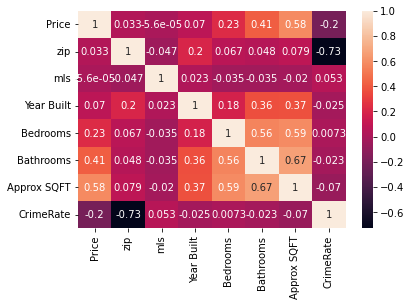

In [24]:
sns.heatmap(df.corr(), annot=True)